In [1]:
import tensorflow as tf
import keras
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error as skmse
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Scaling function #
def Scaling(x,choice):
    if choice==1:
        scaler=MinMaxScaler()
    elif choice==2:
        scaler=StandardScaler()
    elif choice==3:
        scaler=RobustScaler()
    else:
        return (print('bad input!!'))
    mod=scaler.fit(x)
    x=mod.transform(x)
    return x

In [23]:
a=range(1,101)
x=np.array(a)    #input parameter
minx=min(x)
denx=(max(x)-minx)
#print(np.array(x))
x=x-50.5
x=x.reshape(-1,1)

In [24]:
y=-10*(x**3)-4/(x**2)+50    #output parameter
y=y+max(abs(y))/2
#print(y)
miny=min(y)
den=max(y)-miny

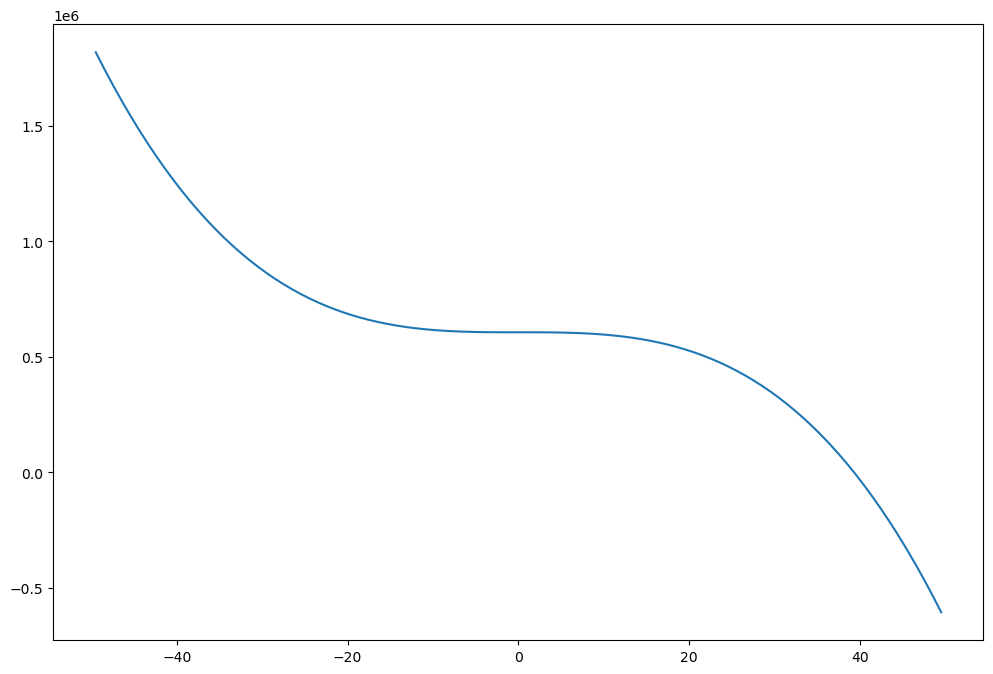

In [25]:
plt.plot(x,y)
plt.show()

In [26]:
# feature scaling of both the input and the output parameters
x=Scaling(x,1)
y=Scaling(y,1)

In [27]:
#Train/test dataset split
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.2, shuffle=True, random_state=42)

In [28]:
# ANN Layer description
model=tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(16, activation='selu', kernel_initializer=tf.keras.initializers.LecunNormal()),
    tf.keras.layers.Dense(8, activation='selu',  kernel_initializer=tf.keras.initializers.LecunNormal()),
    tf.keras.layers.Dense(1)
])

In [29]:
model.compile(optimizer='adam', loss='mse')

In [35]:
model.fit(xtrain, ytrain, epochs=500, batch_size=10, verbose=0)

In [36]:
# Predict
ypred = model.predict(xtest)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


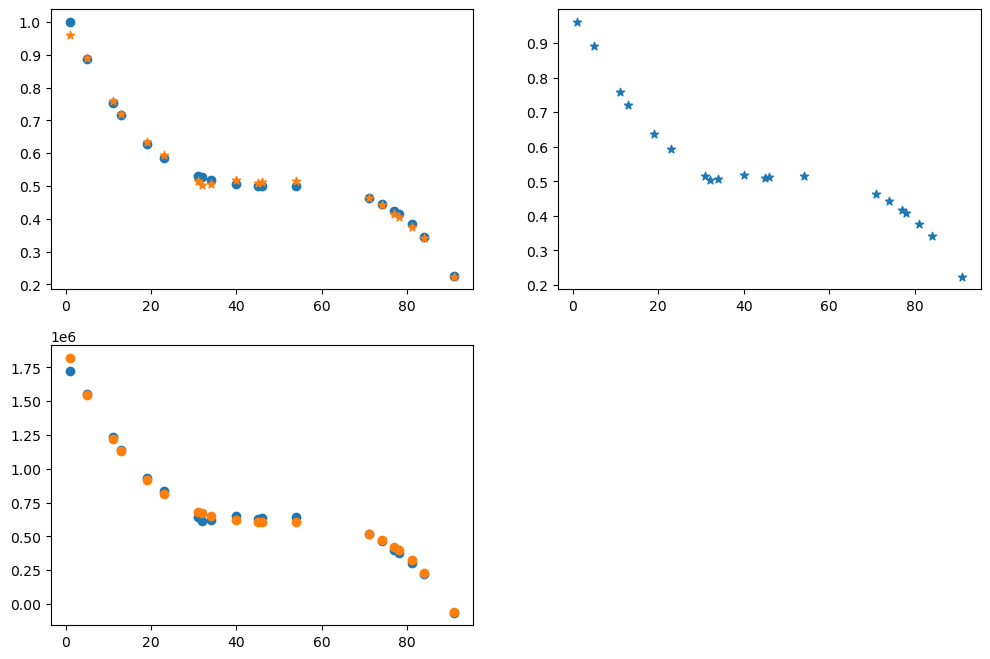

In [37]:
plt.rcParams["figure.figsize"] = (12, 8)
plt.subplot(2,2,1) # x vs ytest and ypredicted in scaled format
plt.scatter(xtest*denx+minx,ytest)
plt.scatter(xtest*denx+minx,ypred, marker='*')
plt.subplot(2,2,2) # x vs ypredicted in scaled format
plt.scatter(xtest*denx+minx,ypred, marker='*')
plt.subplot(2,2,3)# x vs ytest and ypredicted in de-scaled/original format
plt.scatter(xtest*denx+minx,ypred*den+miny)
plt.scatter(xtest*denx+minx,ytest*den+miny) #recovered (de-scaling the output data)
plt.show()

In [38]:
eval=np.hstack([xtest*denx+minx, ytest, ypred, ytest*den+miny, ypred*den+miny])
#eval=eval.reshape(3,20)
print(eval.shape)

Eval=pd.DataFrame(eval, columns=['X Test_Original', 'Y Test_scaled', 'Y Predicted_scaled', 'Y Test_Original', 'Y Predicted_Original'])
print(Eval)

(20, 5)
    X Test_Original  Y Test_scaled  Y Predicted_scaled  Y Test_Original  \
0              84.0       0.345015            0.341917     2.305581e+05   
1              54.0       0.499823            0.515942     6.060828e+05   
2              71.0       0.464485            0.464553     5.203606e+05   
3              46.0       0.500376            0.511350     6.074229e+05   
4              45.0       0.500686            0.510160     6.081755e+05   
5              40.0       0.504772            0.517106     6.180881e+05   
6              23.0       0.585734            0.593974     8.144806e+05   
7              81.0       0.383036            0.376518     3.227856e+05   
8              11.0       0.754065            0.759463     1.222811e+06   
9               1.0       1.000000            0.961430     1.819386e+06   
10             19.0       0.628850            0.635671     9.190706e+05   
11             31.0       0.530567            0.514237     6.806606e+05   
12             74

In [39]:
re = r2_score(ytest*den+miny, ypred*den+miny)
print("R2 Squared Error:", re)

R2 Squared Error: 0.9946512009347149
